## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.348538  1.869589 -1.206351 -0.536609 -0.737280 -0.843670
1 -0.899305  1.846355 -1.619912 -0.382441  0.217385  0.825101
2  0.024590 -0.240432  0.334762  1.967942  1.608903  1.593435
3 -1.364908 -1.319143 -1.053596 -1.034386  0.848537 -1.301190
4  1.513892 -1.257404 -1.603299 -0.436899  1.521373  0.856862


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9302710	total: 60.5ms	remaining: 1m
1:	learn: 0.9221105	total: 61.1ms	remaining: 30.5s
2:	learn: 0.9147472	total: 61.6ms	remaining: 20.5s
3:	learn: 0.9043454	total: 62.1ms	remaining: 15.5s
4:	learn: 0.8970276	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8890783	total: 63.2ms	remaining: 10.5s
6:	learn: 0.8795051	total: 63.6ms	remaining: 9.03s
7:	learn: 0.8716698	total: 64ms	remaining: 7.94s
8:	learn: 0.8638503	total: 64.5ms	remaining: 7.1s
9:	learn: 0.8561397	total: 64.9ms	remaining: 6.42s
10:	learn: 0.8482674	total: 65.5ms	remaining: 5.88s
11:	learn: 0.8412315	total: 66ms	remaining: 5.43s
12:	learn: 0.8335388	total: 66.5ms	remaining: 5.05s
13:	learn: 0.8256090	total: 66.9ms	remaining: 4.71s
14:	learn: 0.8183793	total: 67.3ms	remaining: 4.42s
15:	learn: 0.8090223	total: 67.8ms	remaining: 4.17s
16:	learn: 0.8012312	total: 68.2ms	remaining: 3.94s
17:	learn: 0.7938723	total: 68.9ms	remaining: 3.76s
18:	learn: 0.7876657	total: 69.4ms	remaining: 3.58s


92:	learn: 0.4291517	total: 107ms	remaining: 1.04s
93:	learn: 0.4262260	total: 108ms	remaining: 1.04s
94:	learn: 0.4231317	total: 108ms	remaining: 1.03s
95:	learn: 0.4207085	total: 109ms	remaining: 1.02s
96:	learn: 0.4177478	total: 109ms	remaining: 1.02s
97:	learn: 0.4146190	total: 110ms	remaining: 1.01s
98:	learn: 0.4121386	total: 110ms	remaining: 1s
99:	learn: 0.4089358	total: 111ms	remaining: 996ms
100:	learn: 0.4058848	total: 111ms	remaining: 988ms
101:	learn: 0.4030650	total: 111ms	remaining: 980ms
102:	learn: 0.4003500	total: 112ms	remaining: 974ms
103:	learn: 0.3975702	total: 112ms	remaining: 967ms
104:	learn: 0.3941156	total: 113ms	remaining: 960ms
105:	learn: 0.3912086	total: 113ms	remaining: 954ms
106:	learn: 0.3884549	total: 118ms	remaining: 984ms
107:	learn: 0.3856284	total: 119ms	remaining: 982ms
108:	learn: 0.3827531	total: 120ms	remaining: 977ms
109:	learn: 0.3798744	total: 120ms	remaining: 972ms
110:	learn: 0.3771505	total: 121ms	remaining: 967ms
111:	learn: 0.3738922	t

236:	learn: 0.1633384	total: 188ms	remaining: 605ms
237:	learn: 0.1622473	total: 189ms	remaining: 604ms
238:	learn: 0.1614406	total: 189ms	remaining: 602ms
239:	learn: 0.1604394	total: 190ms	remaining: 600ms
240:	learn: 0.1592013	total: 190ms	remaining: 598ms
241:	learn: 0.1583515	total: 190ms	remaining: 596ms
242:	learn: 0.1572305	total: 191ms	remaining: 594ms
243:	learn: 0.1562579	total: 191ms	remaining: 592ms
244:	learn: 0.1555127	total: 192ms	remaining: 590ms
245:	learn: 0.1541150	total: 192ms	remaining: 588ms
246:	learn: 0.1535413	total: 192ms	remaining: 587ms
247:	learn: 0.1523951	total: 193ms	remaining: 585ms
248:	learn: 0.1512159	total: 193ms	remaining: 583ms
249:	learn: 0.1501737	total: 194ms	remaining: 582ms
250:	learn: 0.1493891	total: 194ms	remaining: 580ms
251:	learn: 0.1485461	total: 195ms	remaining: 578ms
252:	learn: 0.1477166	total: 195ms	remaining: 576ms
253:	learn: 0.1466119	total: 196ms	remaining: 575ms
254:	learn: 0.1458119	total: 196ms	remaining: 573ms
255:	learn: 

459:	learn: 0.0623198	total: 291ms	remaining: 341ms
460:	learn: 0.0621260	total: 291ms	remaining: 340ms
461:	learn: 0.0617610	total: 292ms	remaining: 339ms
462:	learn: 0.0615635	total: 292ms	remaining: 339ms
463:	learn: 0.0612436	total: 292ms	remaining: 338ms
464:	learn: 0.0609518	total: 293ms	remaining: 337ms
465:	learn: 0.0607584	total: 294ms	remaining: 337ms
466:	learn: 0.0604727	total: 294ms	remaining: 336ms
467:	learn: 0.0602894	total: 295ms	remaining: 335ms
468:	learn: 0.0602152	total: 295ms	remaining: 334ms
469:	learn: 0.0599336	total: 296ms	remaining: 333ms
470:	learn: 0.0598632	total: 296ms	remaining: 333ms
471:	learn: 0.0595858	total: 297ms	remaining: 332ms
472:	learn: 0.0593994	total: 297ms	remaining: 331ms
473:	learn: 0.0590792	total: 297ms	remaining: 330ms
474:	learn: 0.0589028	total: 298ms	remaining: 329ms
475:	learn: 0.0585980	total: 298ms	remaining: 328ms
476:	learn: 0.0583252	total: 298ms	remaining: 327ms
477:	learn: 0.0580588	total: 299ms	remaining: 326ms
478:	learn: 

623:	learn: 0.0313496	total: 370ms	remaining: 223ms
624:	learn: 0.0312723	total: 371ms	remaining: 223ms
625:	learn: 0.0311665	total: 372ms	remaining: 222ms
626:	learn: 0.0310166	total: 372ms	remaining: 221ms
627:	learn: 0.0308070	total: 372ms	remaining: 221ms
628:	learn: 0.0307317	total: 373ms	remaining: 220ms
629:	learn: 0.0305508	total: 374ms	remaining: 219ms
630:	learn: 0.0304736	total: 374ms	remaining: 219ms
631:	learn: 0.0303288	total: 374ms	remaining: 218ms
632:	learn: 0.0302547	total: 375ms	remaining: 217ms
633:	learn: 0.0301009	total: 375ms	remaining: 217ms
634:	learn: 0.0299241	total: 376ms	remaining: 216ms
635:	learn: 0.0298511	total: 376ms	remaining: 215ms
636:	learn: 0.0297022	total: 377ms	remaining: 215ms
637:	learn: 0.0295289	total: 377ms	remaining: 214ms
638:	learn: 0.0293760	total: 378ms	remaining: 213ms
639:	learn: 0.0291822	total: 378ms	remaining: 213ms
640:	learn: 0.0290483	total: 378ms	remaining: 212ms
641:	learn: 0.0288928	total: 379ms	remaining: 211ms
642:	learn: 

833:	learn: 0.0145195	total: 474ms	remaining: 94.4ms
834:	learn: 0.0144645	total: 475ms	remaining: 93.8ms
835:	learn: 0.0144239	total: 475ms	remaining: 93.2ms
836:	learn: 0.0143490	total: 475ms	remaining: 92.6ms
837:	learn: 0.0142712	total: 476ms	remaining: 92ms
838:	learn: 0.0142181	total: 476ms	remaining: 91.4ms
839:	learn: 0.0141779	total: 477ms	remaining: 90.8ms
840:	learn: 0.0141514	total: 477ms	remaining: 90.2ms
841:	learn: 0.0141126	total: 478ms	remaining: 89.6ms
842:	learn: 0.0140746	total: 478ms	remaining: 89ms
843:	learn: 0.0140201	total: 479ms	remaining: 88.5ms
844:	learn: 0.0139475	total: 479ms	remaining: 87.9ms
845:	learn: 0.0139099	total: 480ms	remaining: 87.3ms
846:	learn: 0.0138277	total: 480ms	remaining: 86.7ms
847:	learn: 0.0137501	total: 480ms	remaining: 86.1ms
848:	learn: 0.0137209	total: 481ms	remaining: 85.5ms
849:	learn: 0.0136521	total: 481ms	remaining: 84.9ms
850:	learn: 0.0135764	total: 481ms	remaining: 84.3ms
851:	learn: 0.0135109	total: 482ms	remaining: 83.7

997:	learn: 0.0078808	total: 555ms	remaining: 1.11ms
998:	learn: 0.0078361	total: 555ms	remaining: 555us
999:	learn: 0.0078094	total: 556ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

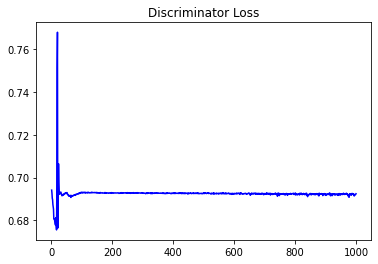

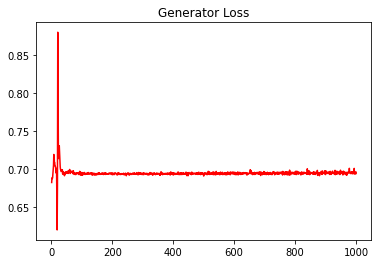

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13350676144426177


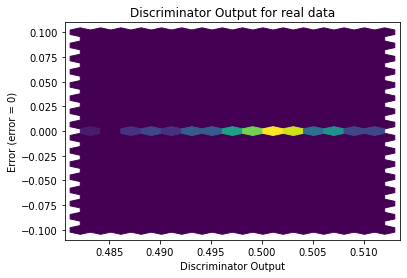

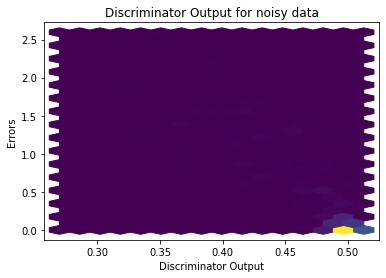

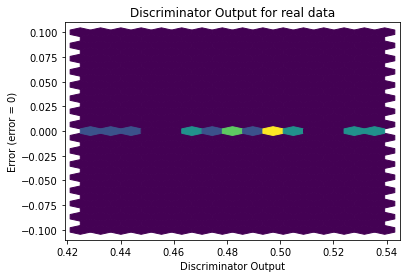

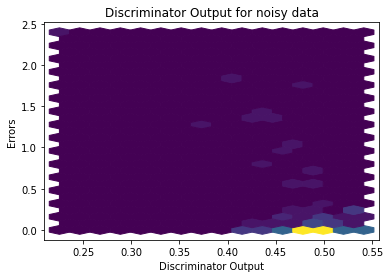

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


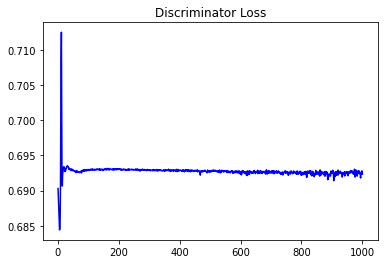

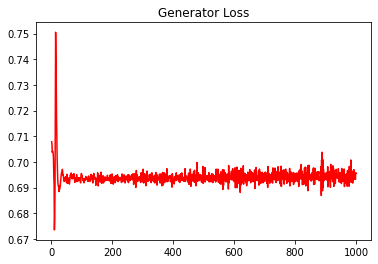

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14634918186622461


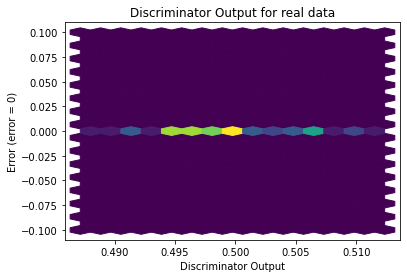

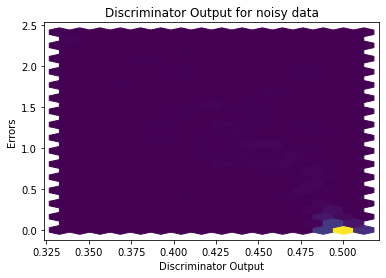

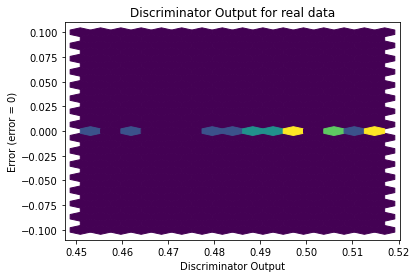

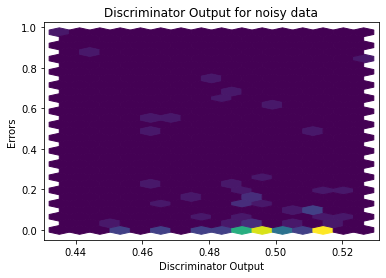

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7300]], requires_grad=True)
